Censor Component Failure Prediction

1) Problem statement. 
                                                                                                                    
Data: Sensor Data                                                                                                                         
Problem statement : 

The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.

The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

True class	      Positive	Negative	
Predicted class			
Positive	          -	     cost_1	
Negative	       cost_2		-

Cost 1 = 10 and Cost 2 = 500

The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown.

Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.

From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly we have to reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.

Challenges and other objectives:                                                                          

Need to Handle many Null values in almost all columns                                                                                     
No low-latency requirement.                                                                                                              
Interpretability is not important.                                                                                                     
misclassification leads the unecessary repair costs.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import missingno as msno
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [35]:
# loaded the csv file by copy path
df = pd.read_csv("/config/workspace/aps_failure_training_set1.csv", na_values= 'na')
df.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
5,pos,1056758,0.0,42328.0,856.0,0.0,0.0,0.0,50394.0,184552.0,...,1450086.0,713608.0,1750894.0,4054554.0,4096660.0,2295880.0,220478.0,482.0,0.0,0.0
6,pos,361638,0.0,280.0,NaN,0.0,0.0,0.0,0.0,0.0,...,266410.0,114746.0,180006.0,108294.0,111218.0,264410.0,33734.0,0.0,0.0,0.0
7,pos,791254,NaN,NaN,NaN,NaN,NaN,0.0,14868.0,921256.0,...,3625532.0,1380864.0,3262488.0,5727988.0,7563752.0,12114820.0,264714.0,198.0,NaN,NaN
8,pos,1053152,NaN,NaN,NaN,NaN,NaN,2.0,2.0,30.0,...,7093206.0,3379622.0,7362340.0,8442584.0,8120144.0,5082396.0,6259760.0,176752.0,NaN,NaN
9,pos,785270,NaN,NaN,8994.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [36]:
df.shape

(36188, 171)

In [37]:
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

Observations: Here it is a binary class classification and the classes are imbalanced

In [38]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

In [39]:
print(categorical_feature)
print(numerical_feature)


['class']
['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', '

Observations: There are 170 numerical and 1 categorical features

In [40]:
df.isnull().sum().sum()

515662

<Axes: >

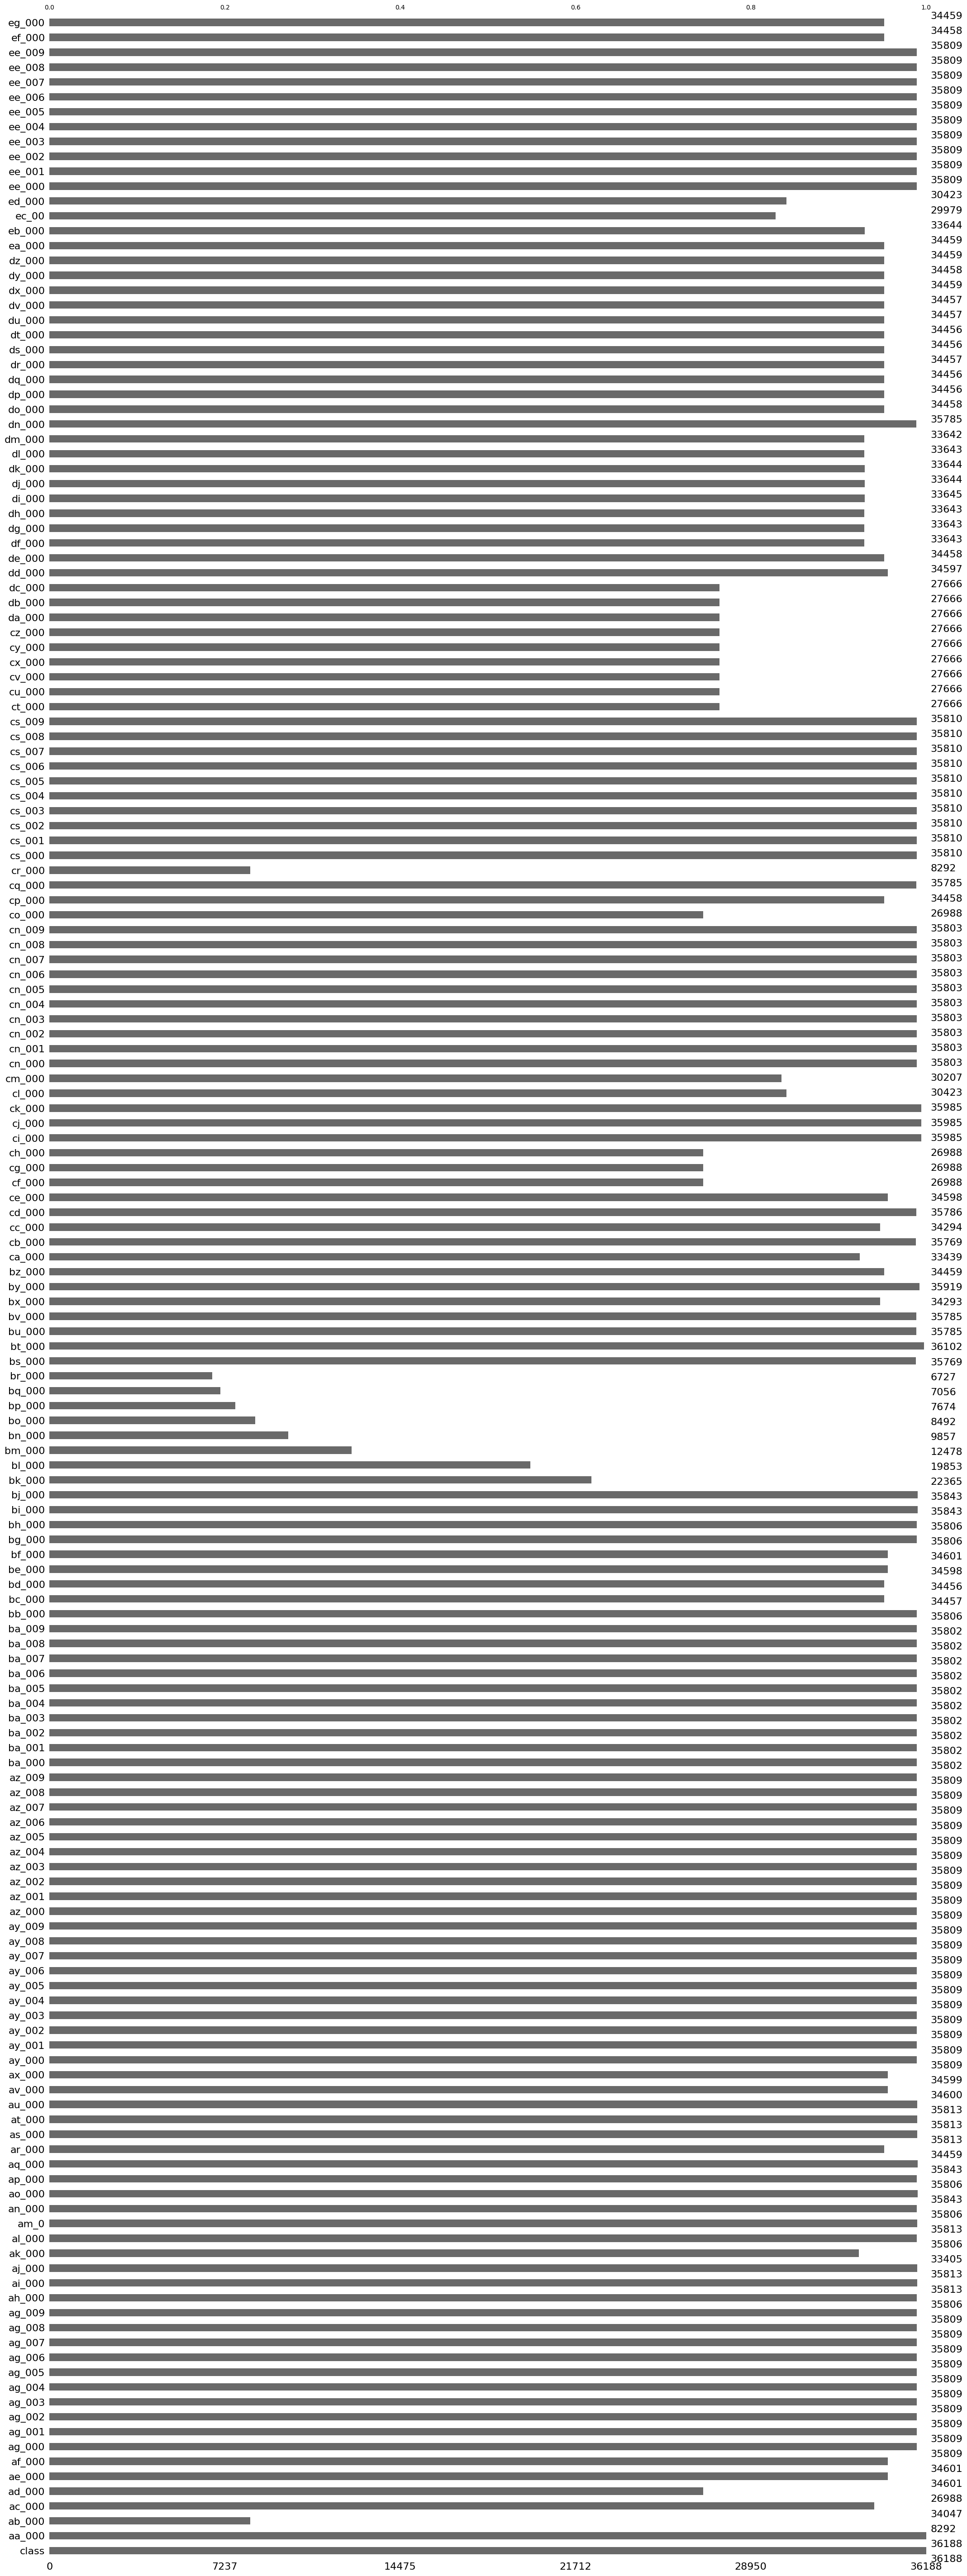

In [41]:
# visualizing missing values as there are many columns
msno.bar(df)

In [ ]:
# visualizing missing values in percentage so it is easy to decide which columns to drop
missing_values = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)

# Plotting bar graph
fig,ax = plt.subplots(figsize = (15,5))
# doing transpose
ax.bar(missing_values.index, missing_values.values.T[0])
plt.xticks("missing values")
plt.ylabel("Percentage missing")
plt.show()


Observation : We can drop columns where missing values > 70%

**Handling Missing Values**

In [ ]:
#columns that has missing val > 70%
drop_cols = missing_values[missing_values[0]>70]
print(drop_cols)

#dropping those columns
df.drop(list(drop_cols.index), axis = 1, inplace=True)

                0
br_000  81.410965
bq_000  80.501824
bp_000  78.794075
ab_000  77.086327
cr_000  77.086327
bo_000  76.533658
bn_000  72.761689


In [ ]:
df.shape

(36188, 164)

In [ ]:
# checking for data imbalancement
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

Observation: 

The target classes are highly imbalanced                                                                                                   
Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)                                    
If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.                      
Hence we should handle imbalanced data with certain methods.

**Create Functions for model training and evaluation**

In [ ]:
# function to evaluate the model

def evaluate(true,pred):
    accuracy = accuracy_score(true,pred)
    precision = precision_score(true,pred)
    recall = recall_score(true,pred)
    f1 = f1_score(true.pred)
    roc_auc = roc_auc_score(true,pred)

    return accuracy, precision, recall, f1, roc_auc


In [ ]:
# function that gives us the total cost
def total_cost(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    cost = 10*fp + 500*fn
    
    return cost    

In [ ]:
# function that evaluates the models and return a report 
'''
This function takes in X and y and models dictionary as input
It splits the data into Train Test split
Iterates through the given model dictionary and evaluates the metrics
Returns: Dataframe which contains report of all models metrics with cost
'''

def model_build_evaluate(X,y,models):

    # split data
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state=42)

    cost_list = []
    model_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        
        # train model
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        # make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # evaluate train set performance and cost
        train_accuracy, train_precision, train_recall, train_f1_score, train_roc_auc_score = evaluate(y_train, y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)

        # evaluate test set performance and cost
        test_accuracy, test_precision, test_recall, test_f1_score, test_roc_auc_score = evaluate(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        # print
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(train_accuracy))
        print('- Precision: {:.4f}'.format(train_precision))
        print('- Recall: {:.4f}'.format(train_recall))
        print('- F1 score: {:.4f}'.format(train_f1_score)) 
        print('- Roc Auc Score: {:.4f}'.format(train_roc_auc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(test_accuracy))
        print('- Precision: {:.4f}'.format(test_precision))
        print('- Recall: {:.4f}'.format(test_recall))
        print('- F1 score: {:.4f}'.format(test_f1_score))
        print('- Roc Auc Score: {:.4f}'.format(test_roc_auc_score))
        print(f'- COST: {test_cost}.')

        # appending test_cost in cost list
        cost_list.append(test_cost)
        print('='*35)
        print('\n')

    # creating report
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
    return report